<a href="https://colab.research.google.com/github/DoCaoDuy/BaitapAI/blob/main/Nhan_Dien_Khuon_Mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


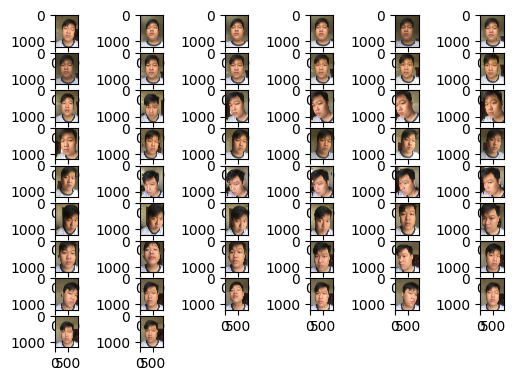

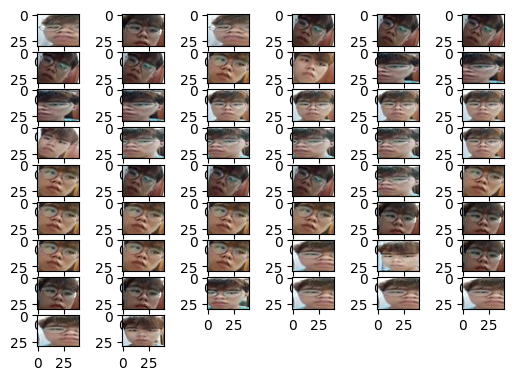

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img , img_to_array 
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import numpy as np
from google.colab import drive
from keras.models import load_model
drive.mount('/content/drive')

folder = '/content/drive/MyDrive/New folder/'
for i in range(50):
  plt.subplot(10,6,i+1)
  file_name=folder+'duy'+ str(i) +'.jpg'
  img=imread(file_name)
  plt.imshow(img)
plt.show()

folder = '/content/drive/MyDrive/New folder/'
for i in range(50):
  plt.subplot(10,6,i+1)
  file_name=folder+'Phuc'+ str(i) +'.jpg'
  img=imread(file_name)
  plt.imshow(img)
plt.show()

In [ ]:
import os

folder = '/content/drive/MyDrive/New folder/'
photos, labels = list(), list()

for file in os.listdir(folder):
    if os.path.isfile(os.path.join(folder, file)):
        for i in range(50):
            if file.startswith('duy' + str(i)):
                output = 0
            elif file.startswith('Phuc' + str(i)):
                output = 1
            elif file.startswith('quocdung' + str(i)):
                output = 2
            elif file.startswith('tan' + str(i)):
                output = 3
            elif file.startswith('thuan' + str(i)):
                output = 4          
            else:           
                continue               
            photo = load_img(os.path.join(folder, file), target_size=(200, 200))
            photo = img_to_array(photo)
            photos.append(photo)
            labels.append(output)
classes = ["duy","Phuc",'quocdung','tan','thuan']
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('NDKM.npy', photos)
save('NDKM.npy', labels)

(370, 200, 200, 3) (370,)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

history = model.fit(photos, labels, epochs=15,  batch_size=512, verbose=1)


Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: 172.8913 - accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 1s 885ms/step - loss: 3013.5134 - accuracy: 0.1568
Epoch 3/15
1/1 [==============================] - 1s 842ms/step - loss: 7060.6421 - accuracy: 0.2703
Epoch 4/15
1/1 [==============================] - 1s 843ms/step - loss: 10393.9258 - accuracy: 0.2703
Epoch 5/15
1/1 [==============================] - 1s 852ms/step - loss: 5402.3262 - accuracy: 0.1405
Epoch 6/15
1/1 [==============================] - 1s 858ms/step - loss: 4074.8008 - accuracy: 0.1622
Epoch 7/15
1/1 [==============================] - 1s 852ms/step - loss: 1745.2928 - accuracy: 0.1622
Epoch 8/15
1/1 [==============================] - 1s 841ms/step - loss: 318.0376 - accuracy: 0.7027
Epoch 9/15
1/1 [==============================] - 1s 839ms/step - loss: 406.7535 - accuracy: 0.2703
Epoch 10/15
1/1 [==============================] - 1s 840ms/step - loss: 167.0798 - accuracy

In [ ]:
model.evaluate(photos,labels)

12/12 [==============================] - 0s 36ms/step - loss: 4.1622 - accuracy: 0.8000


[4.162158966064453, 0.800000011920929]

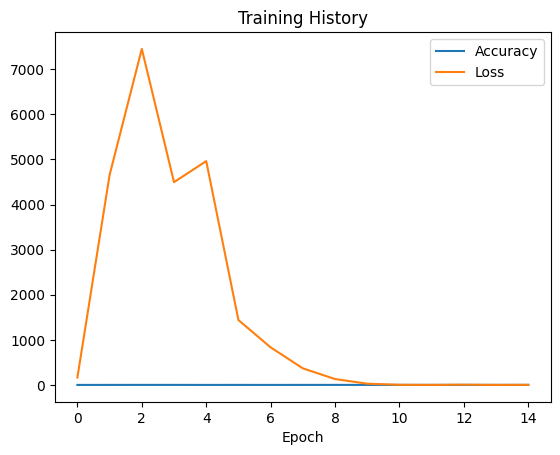

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
plt.plot(accuracy)
plt.plot(loss)
plt.title('Training History')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'])
plt.show()

1/1 [==============================] - 0s 34ms/step
[[0.12585492 0.13847363 0.1093649  0.11993454 0.12530126 0.07552937
  0.12786685 0.03767287 0.07117222 0.06882942]]


'Phuc'

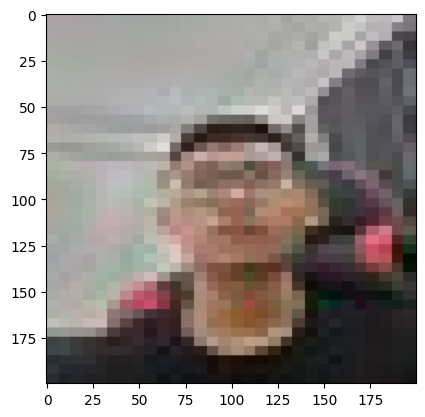

In [ ]:
img = load_img('/content/drive/MyDrive/New folder/quocdung30.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]


1/1 [==============================] - 0s 25ms/step


'Phuc'

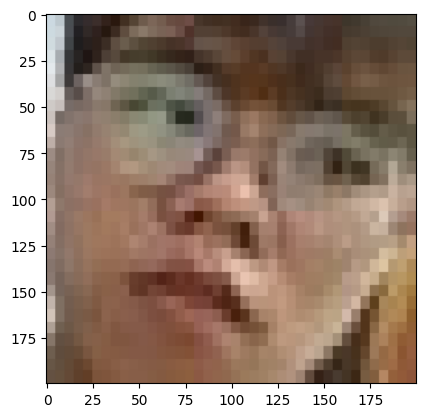

In [ ]:
img = load_img('/content/drive/MyDrive/New folder/Phuc30.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 55ms/step


'tan'

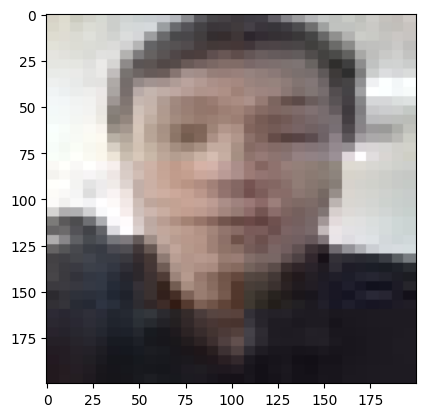

In [ ]:
img = load_img('/content/drive/MyDrive/New folder/tan32.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 106ms/step


'tan'

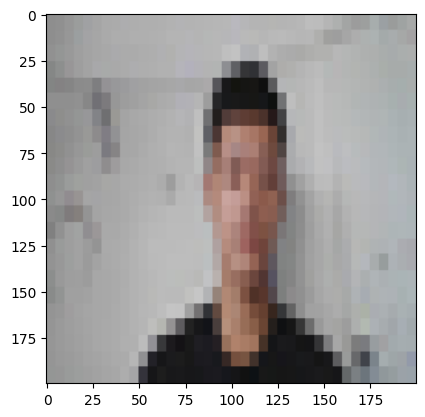

In [ ]:
img = load_img('/content/drive/MyDrive/New folder/thuan32.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 31ms/step


'duy'

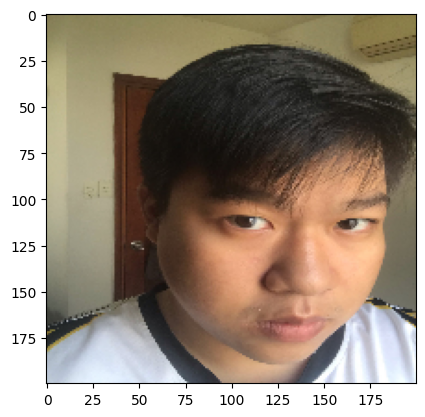

In [ ]:
img = load_img('/content/drive/MyDrive/New folder/duy32.jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
#print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]